In [1]:
# Import libraries. 
# Generate images in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import collections
from collections import defaultdict
import gzip
import itertools
import numpy as np
import os
import time
import pandas as pd
import seaborn as sns

import bokeh
import bokeh.io
from bokeh.io import push_notebook
from bokeh.plotting import figure, show, save, output_notebook, output_file

# Import colour palettes for later on
from bokeh.palettes import Category20b
from bokeh.palettes import Purples
from bokeh.palettes import Greens
from bokeh.palettes import YlOrBr
from bokeh.palettes import YlOrRd
from bokeh.palettes import PuOr
from bokeh.palettes import RdGy

# Dimension reduction tools
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE
import umap 

In [8]:

population_names= pd.read_excel(r'sample_info.xls')
print(population_names)


    Sample         Population
0      ACP               Rest
1      AGO               Rest
2      AHC               Rest
3     AM01  West_Grande_Terre
4     AM07  West_Grande_Terre
..     ...                ...
138  WMAL4       West_Malabar
139  WMAL5       West_Malabar
140  WMAL6       West_Malabar
141  WMAL7       West_Malabar
142   ZOO1               Rest

[143 rows x 2 columns]


In [10]:
Data_Struct=population_names
#Data_Struct['X1']=np.arange(1,144)
#Data_Struct['X2']=np.random.rand(143,1)

(143, 143)
(143, 143)


<Axes: >

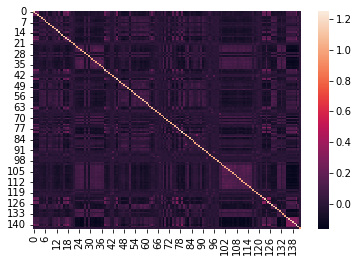

In [25]:
cov_mat= pd.read_excel(r'mm1_50_maf05.xls')
cov_mat_np=cov_mat.to_numpy()

#print(cov_mat.shape)
#print(cov_mat_np.shape)

#sns.heatmap(cov_mat_np)
#print(cov_mat_np)

In [26]:
eigenvals, eigen_vecs = np.linalg.eig(cov_mat_np)
eigvec_mltply_val=eigen_vecs.real*eigenvals.real
print(eigen_vecs.shape)
print(eigvec_mltply_val.shape)

(143, 143)
(143, 143)


In [81]:
expl=np.cumsum(eigenvals)/len(eigenvals)

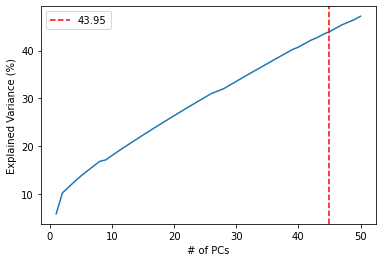

In [88]:
plt.plot(np.arange(1,51),expl[:50]*100)
plt.xlabel("# of PCs")
plt.ylabel("Explained Variance (%)")
plt.axvline(x = 45, color = 'r',linestyle = '--',label = str(round(expl[44]*100,2)))
plt.legend()

In [30]:
Data_Struct['EigenVect1']=eigen_vecs.real[:,0]
Data_Struct['EigenVect2']=eigen_vecs.real[:,1]
Data_Struct['EigenVect*Val1']=eigvec_mltply_val.real[:,0]
Data_Struct['EigenVect*Val2']=eigvec_mltply_val.real[:,1]

print(Data_Struct.head(5))




  Sample         Population  X1        X2  EigenVect1  EigenVect2  \
0    ACP               Rest   1  0.280719    0.092726   -0.175323   
1    AGO               Rest   2  0.059269    0.076213   -0.146897   
2    AHC               Rest   3  0.318263    0.075676   -0.156590   
3   AM01  West_Grande_Terre   4  0.581368    0.023881    0.060449   
4   AM07  West_Grande_Terre   5  0.879909    0.023479    0.083125   

   EigenVect*Val1  EigenVect*Val2  
0        0.782583       -1.096168  
1        0.643218       -0.918439  
2        0.638684       -0.979042  
3        0.201552        0.377945  
4        0.198158        0.519721  


In [89]:
# Number of principal components to use
n_pc = 30

In [90]:
# Project the eigenvectors via t-SNE to 2 dimensions.
#eigen_vecs_abs=abs(eigen_vecs)
eigen_vecs_abs=eigen_vecs.real
proj_tsne_eig = TSNE(n_components=2).fit_transform(eigen_vecs_abs[:,:n_pc])

In [91]:
# Project the eigenvectors via UMAPto 2 dimensions.
proj_umap_eig = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1).fit_transform(eigen_vecs_abs[:,:n_pc])

In [92]:
# Project the eigenvectors*eigenvalues via t-SNE to 2 dimensions.
proj_tsne_eigvecval = TSNE(n_components=2).fit_transform(eigvec_mltply_val[:,:n_pc])

In [93]:
# Project the eigenvectors via UMAPto 2 dimensions.
proj_umap_eigvecval = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1).fit_transform(eigvec_mltply_val[:,:n_pc])

In [94]:
Data_Struct['tSNE1']=proj_tsne_eig[:,0]
Data_Struct['tSNE2']=proj_tsne_eig[:,1]

Data_Struct['tSNE1_multip']=proj_tsne_eigvecval[:,0]
Data_Struct['tSNE2_multip']=proj_tsne_eigvecval[:,1]

Data_Struct['UMAP1']=proj_umap_eig[:,0]
Data_Struct['UMAP2']=proj_umap_eig[:,1]

Data_Struct['UMAP1_multip']=proj_umap_eigvecval[:,0]
Data_Struct['UMAP2_multip']=proj_umap_eigvecval[:,1]

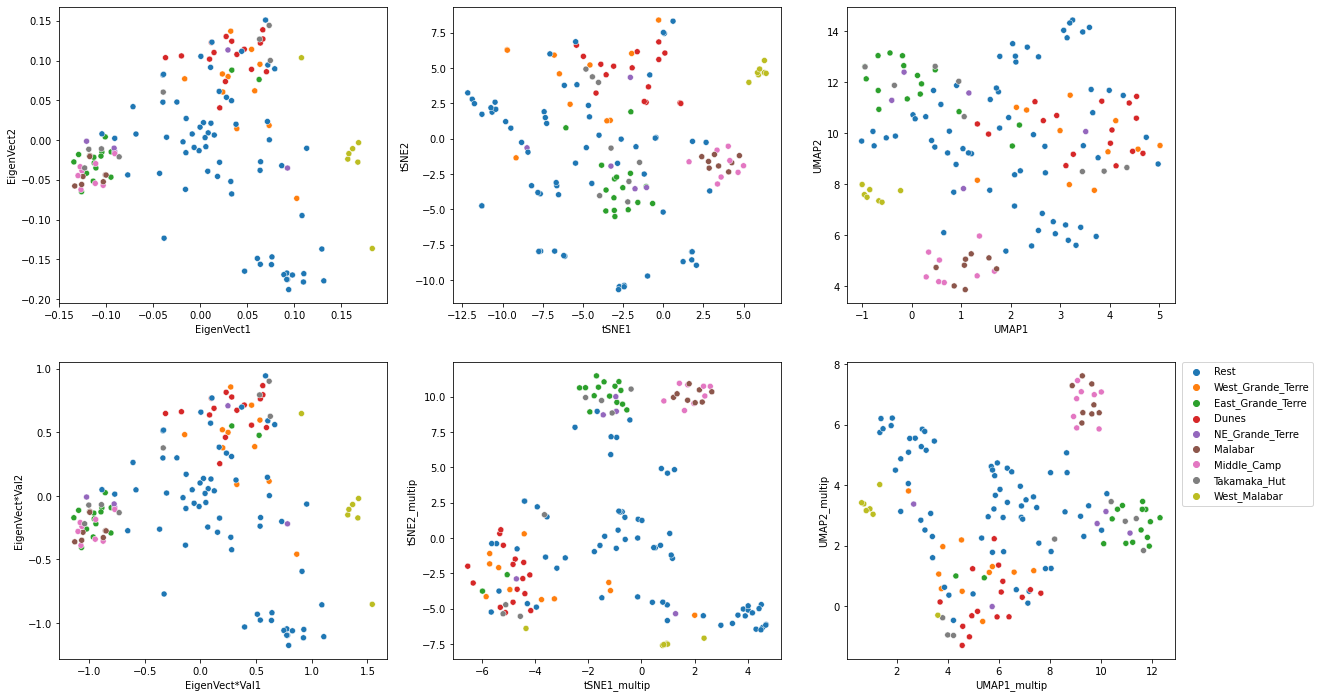

In [72]:
fig, axs = plt.subplots(2, 3,figsize=(20, 12))

#axs[1,1] = Data_Struct.plot.scatter(x='X1',y='X2',c='Population')

sns.scatterplot(ax=axs[0,0],data=Data_Struct, x='EigenVect1', y='EigenVect2', hue='Population',legend = False)
sns.scatterplot(ax=axs[0,1],data=Data_Struct, x='tSNE1', y='tSNE2', hue='Population',legend = False)
sns.scatterplot(ax=axs[0,2],data=Data_Struct, x='UMAP1', y='UMAP2', hue='Population',legend = False)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

sns.scatterplot(ax=axs[1,0],data=Data_Struct, x='EigenVect*Val1', y='EigenVect*Val2', hue='Population',legend = False)
sns.scatterplot(ax=axs[1,1],data=Data_Struct, x='tSNE1_multip', y='tSNE2_multip', hue='Population',legend = False)
sns.scatterplot(ax=axs[1,2],data=Data_Struct, x='UMAP1_multip', y='UMAP2_multip', hue='Population')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


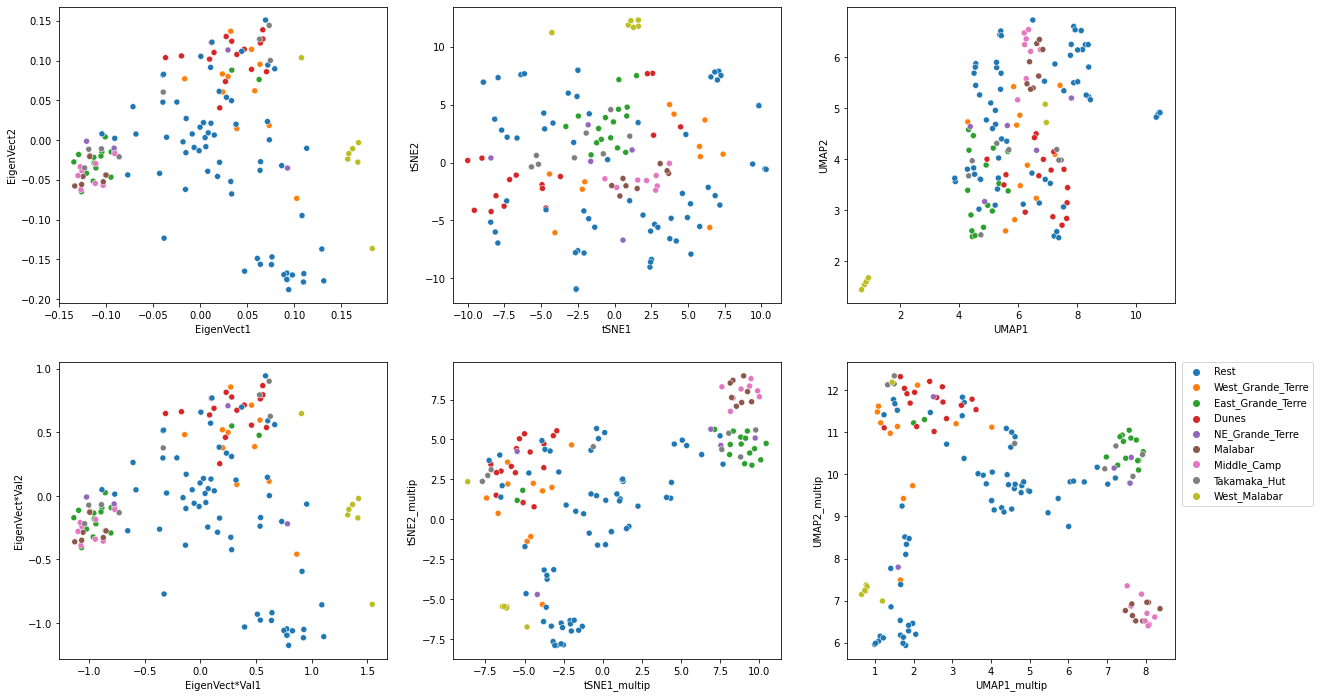

In [95]:
fig, axs = plt.subplots(2, 3,figsize=(20, 12))

#axs[1,1] = Data_Struct.plot.scatter(x='X1',y='X2',c='Population')

sns.scatterplot(ax=axs[0,0],data=Data_Struct, x='EigenVect1', y='EigenVect2', hue='Population',legend = False)
sns.scatterplot(ax=axs[0,1],data=Data_Struct, x='tSNE1', y='tSNE2', hue='Population',legend = False)
sns.scatterplot(ax=axs[0,2],data=Data_Struct, x='UMAP1', y='UMAP2', hue='Population',legend = False)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

sns.scatterplot(ax=axs[1,0],data=Data_Struct, x='EigenVect*Val1', y='EigenVect*Val2', hue='Population',legend = False)
sns.scatterplot(ax=axs[1,1],data=Data_Struct, x='tSNE1_multip', y='tSNE2_multip', hue='Population',legend = False)
sns.scatterplot(ax=axs[1,2],data=Data_Struct, x='UMAP1_multip', y='UMAP2_multip', hue='Population')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)